### 1. Import Dependecies

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load Data

In [2]:
df = pd.read_csv('data/processed/Missing_Values_Handled.csv')
df.head()

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


### 3. Outlier Detection techniques

#### 3.1 Distribution plots

In [3]:
df.nunique()

Platform               4
Hashtag               10
Content_Type           6
Region                 8
Views               4996
Likes               4972
Shares              4877
Comments            4735
Engagement_Level       3
dtype: int64

In [4]:
numerical_columns = ['Views', 'Likes', 'Shares', 'Comments']
categorical_columns = ['Platform', 'Hashtag', 'Content_Type', 'Region', 'Engagement_Level']

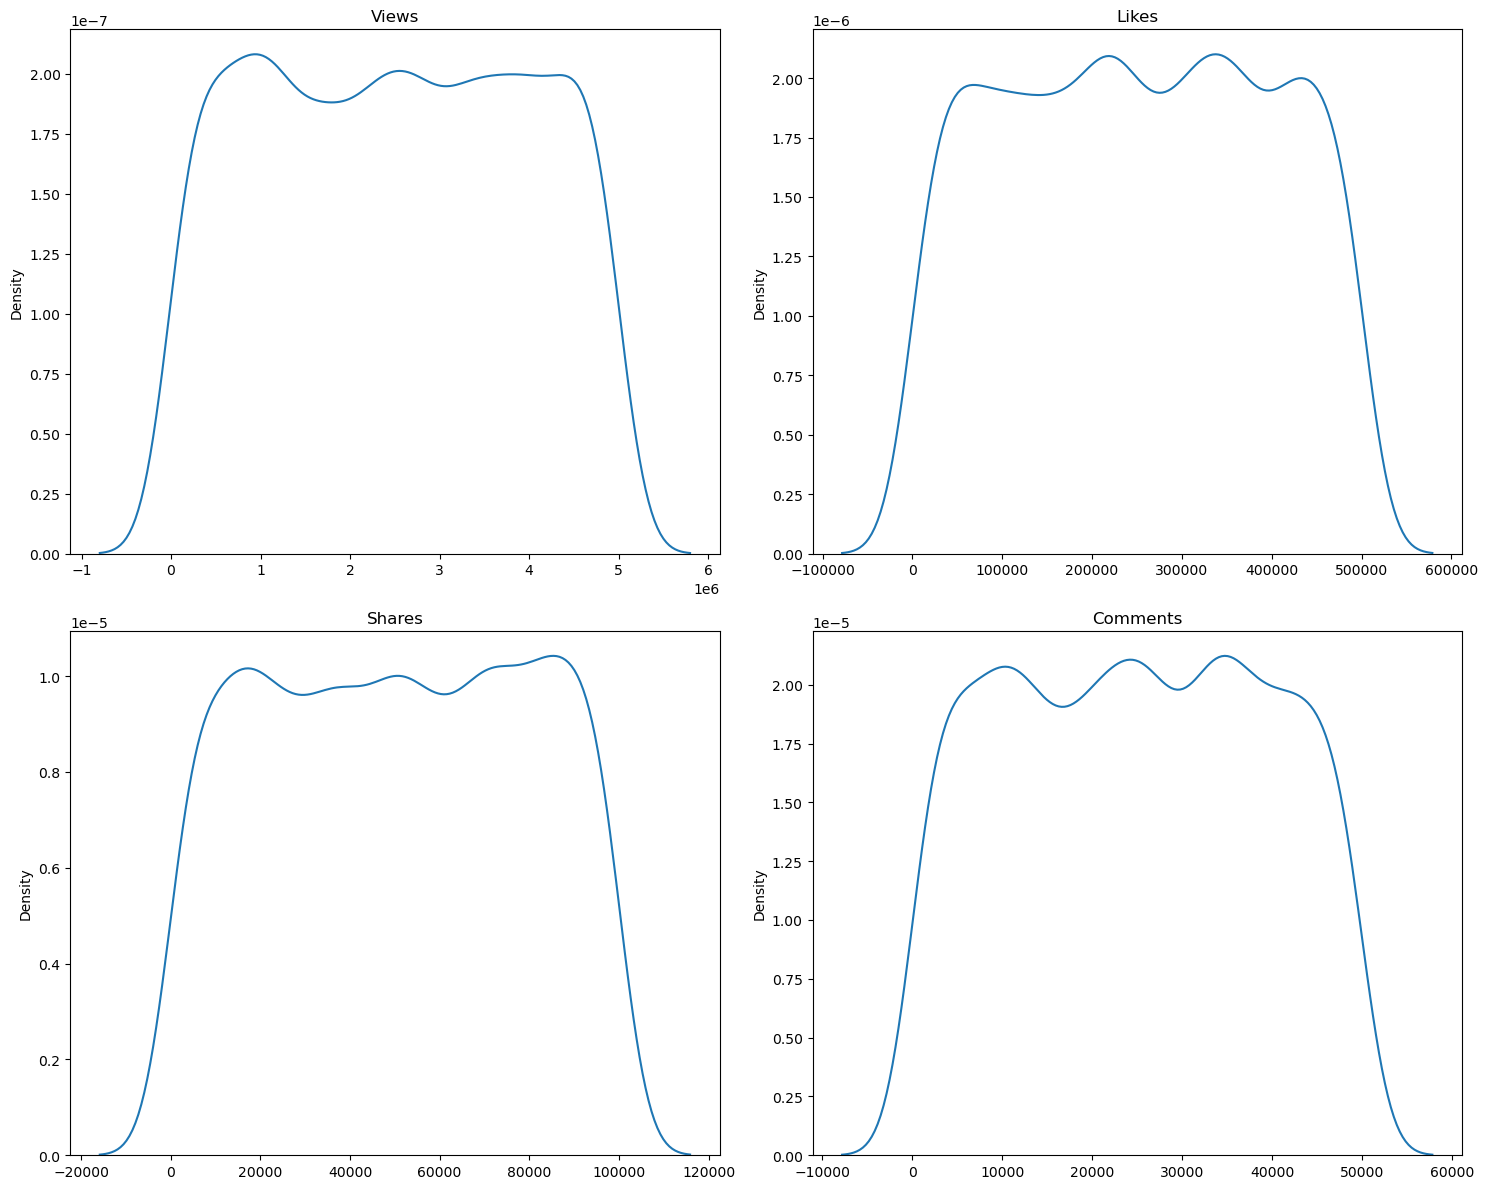

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 3x3 grid = 9 slots
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=df[col], ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

# Hide unused subplots
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('figures/distribution_plots.jpg')
plt.show()

#### 3.2 Pie plots

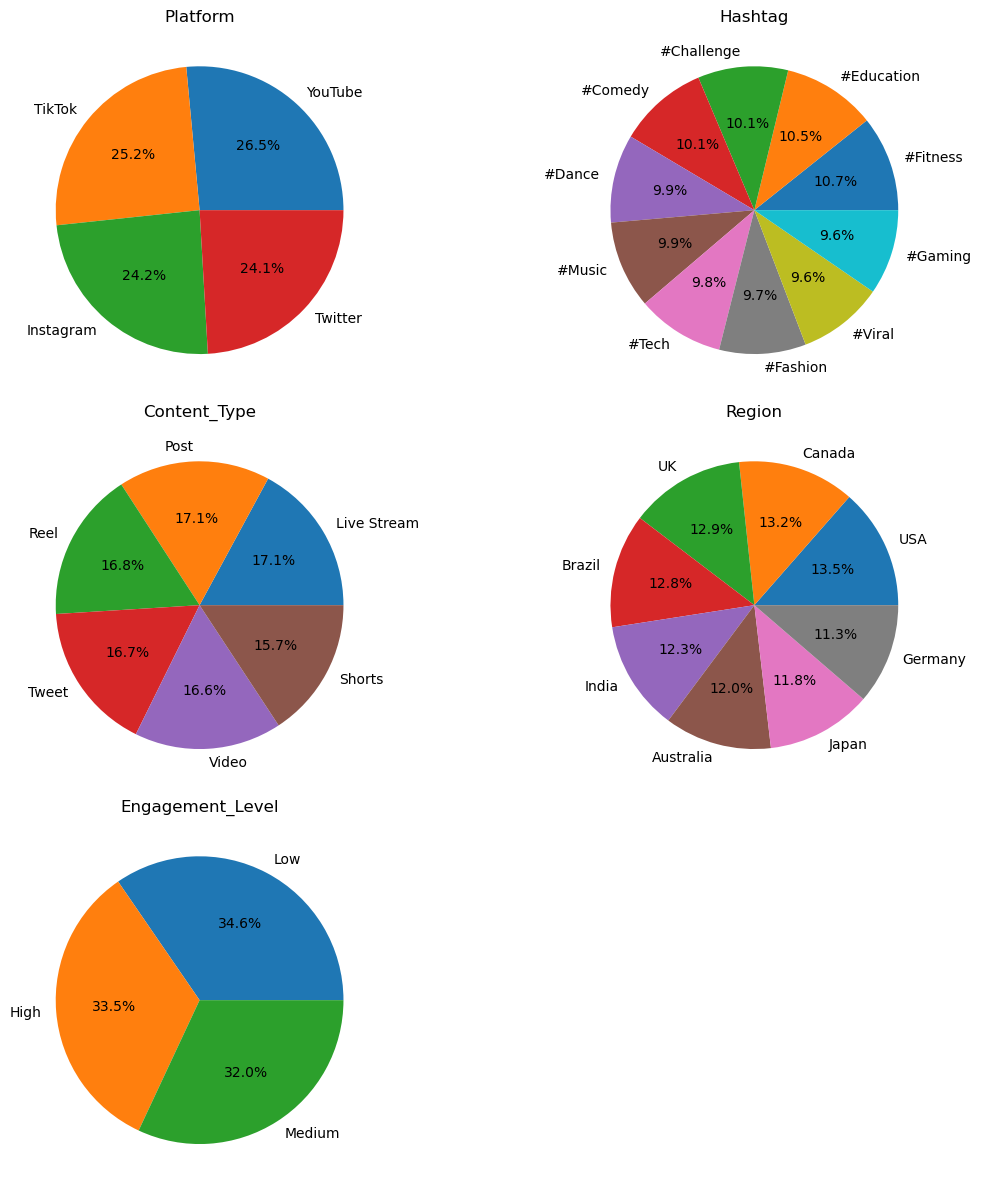

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten() 

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        ax=axes[idx]
    )
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

# Hide any unused subplot (the 6th one)
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('figures/pie_charts.jpg')
plt.show()


#### 3.3 Box Plots

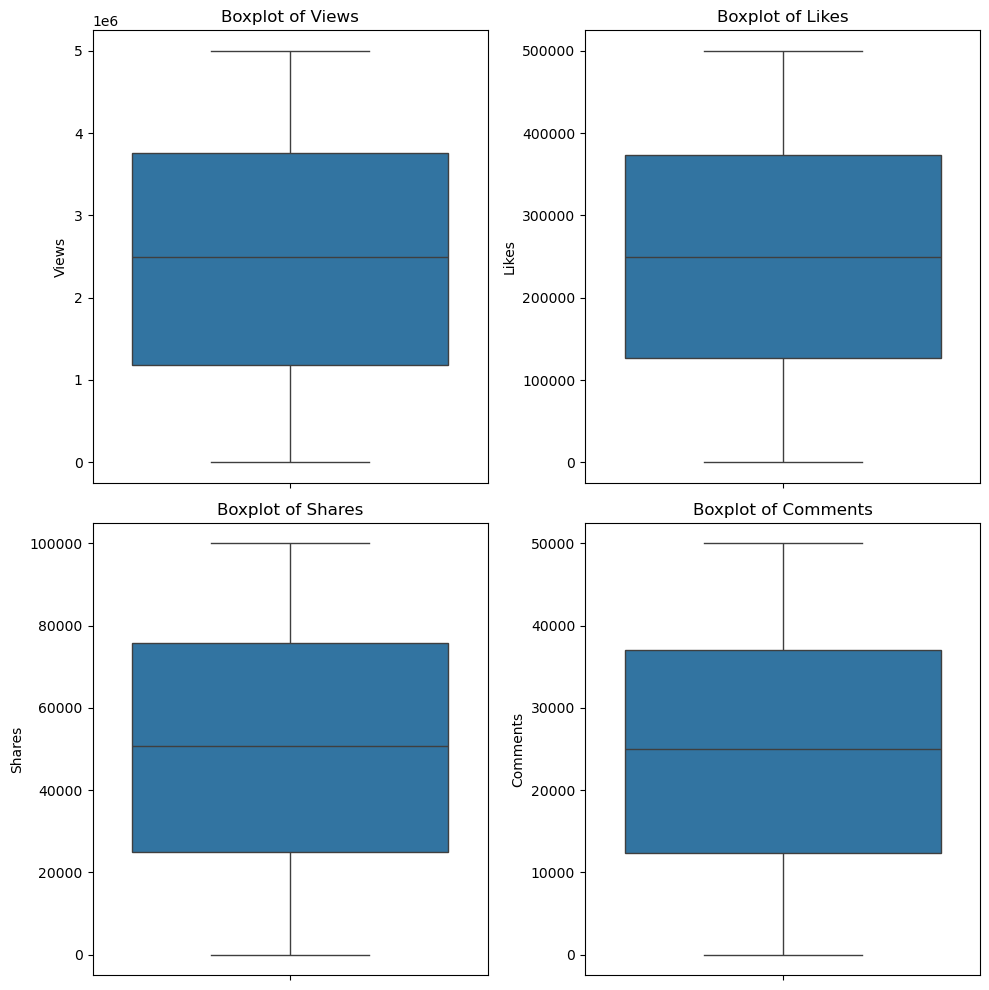

In [7]:
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()  # flatten for easy indexing

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('figures/box_plots.jpg')
plt.show()

#### 3.4 empirical rule / 3-sigma rule

In [8]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data > upper_bound) | (data < lower_bound)

In [9]:
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

Views : 0 outliers (0.0 %)
Likes : 0 outliers (0.0 %)
Shares : 0 outliers (0.0 %)
Comments : 0 outliers (0.0 %)


#### 3.5 IQR Method

In [10]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1 

    upper_bound = Q3 + 3 * IQR
    lower_bound = Q1 - 3 * IQR 

    return (data > upper_bound) | (data < lower_bound)

In [11]:
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

Views : 0 outliers (0.0 %)
Likes : 0 outliers (0.0 %)
Shares : 0 outliers (0.0 %)
Comments : 0 outliers (0.0 %)


#### 3.6 Logical Way of handling outliers (Domain specific)

In [12]:

print(f'Posts with Comments >= Views: {len(df[df["Comments"] >= df["Views"]])}')
print(f'Posts with Likes >= Views: {len(df[df["Likes"] >= df["Views"]])}')
print(f'Posts with Shares >= Views: {len(df[df["Shares"] >= df["Views"]])}')
df.shape[0]

Posts with Comments >= Views: 25
Posts with Likes >= Views: 268
Posts with Shares >= Views: 50


5000

In [13]:
df_filtered = df.copy()
df_filtered = df_filtered[
    (df_filtered["Likes"] <= df_filtered["Views"]) &
    (df_filtered["Comments"] <= df_filtered["Views"]) &
    (df_filtered["Shares"] <= df_filtered["Views"])
]

print(f'Posts with Comments >= Views: {len(df_filtered[df_filtered["Comments"] >= df_filtered["Views"]])}')
print(f'Posts with Likes >= Views: {len(df_filtered[df_filtered["Likes"] >= df_filtered["Views"]])}')
print(f'Posts with Shares >= Views: {len(df_filtered[df_filtered["Shares"] >= df_filtered["Views"]])}')

Posts with Comments >= Views: 0
Posts with Likes >= Views: 0
Posts with Shares >= Views: 0


In [14]:
df_filtered.shape[0]

4730

In [15]:
df_filtered.to_csv( 'data/processed/Outliers_Handled.csv', index=False)